In [2]:
import soundfile as sf
import torchaudio
import librosa.display

In [3]:
torchaudio.datasets.LIBRISPEECH(root = '../data', url='train-clean-100', download= True)

In [ ]:
import soundfile as sf
path = '../data/LibriSpeech/train-clean-100/441/128988/441-128988-0034.flac'                                                  
with open(path, 'rb') as f:
    data, samplerate = sf.read(f)              

Out[3]: Text(0.5, 0, 'Time [sec]')

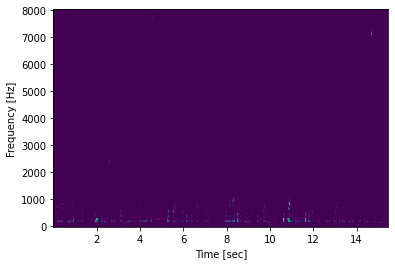

In [ ]:
import matplotlib.pyplot as plt
import scipy.signal as signal

freq, time, Sxx = signal.spectrogram(data, samplerate, scaling='spectrum')
plt.pcolormesh(time, freq, Sxx)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

Out[4]: Text(0.5, 0, 'Time [sec]')

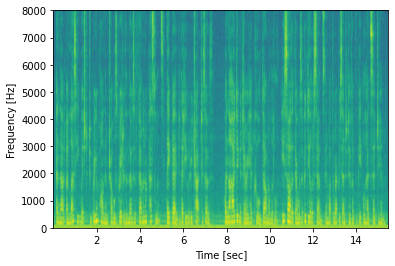

In [ ]:
Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

Out[8]: <librosa.display.AdaptiveWaveplot at 0x7efaf5d2a430>

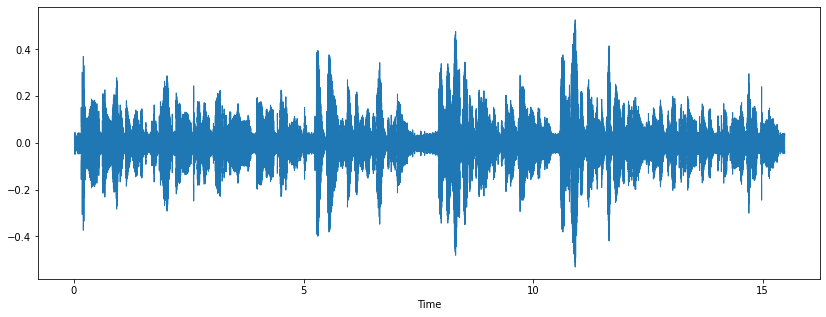

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr = samplerate)

Out[10]: <matplotlib.colorbar.Colorbar at 0x7efaf6ace880>

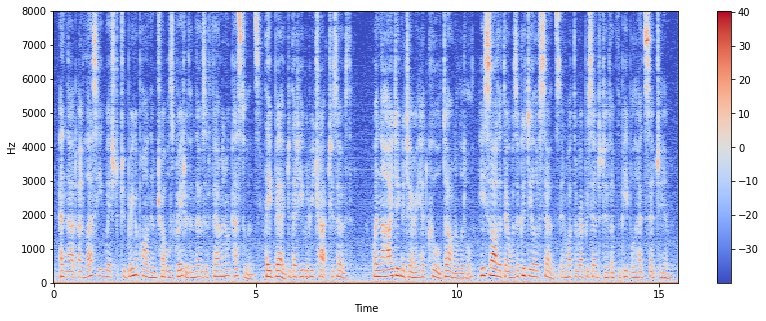

In [ ]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=samplerate, x_axis='time', y_axis='hz')
plt.colorbar()

#### Feature Extraction

In [ ]:

import sklearn
spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=samplerate)[0]
spectral_centroids.shape

Out[26]: (484,)

In [ ]:
len(spectral_centroids)

Out[24]: 484

In [ ]:
data.shape

Out[23]: (247520,)

Out[14]: [<matplotlib.lines.Line2D at 0x7efaf31fddc0>]

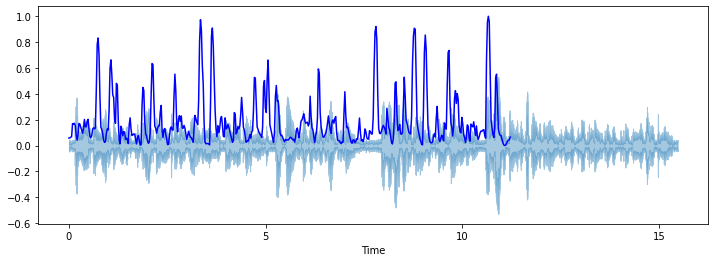

In [ ]:

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(data, sr=samplerate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

Out[17]: [<matplotlib.lines.Line2D at 0x7efaf68f6910>]

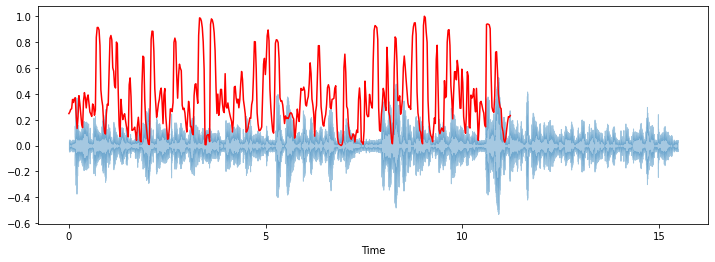

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=data+0.01, sr=samplerate)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=samplerate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

Out[19]: <matplotlib.legend.Legend at 0x7efaf64ad580>

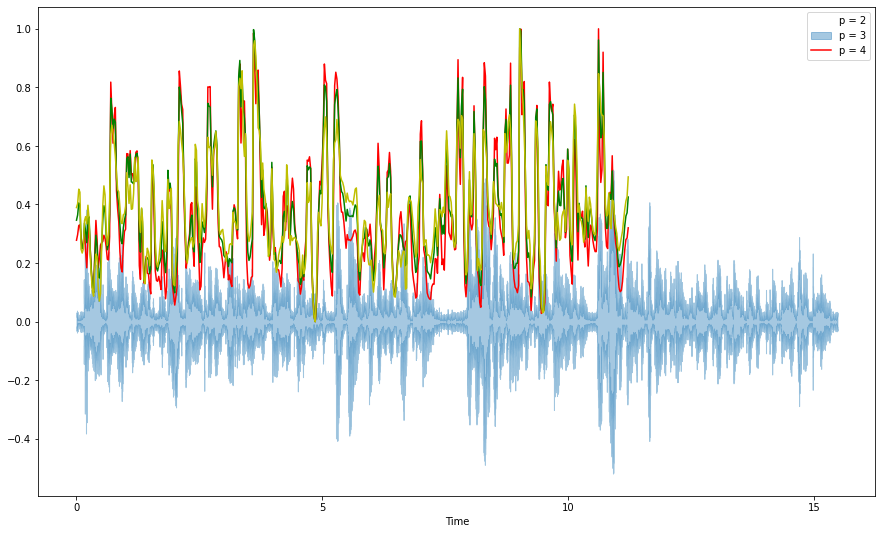

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y = data+0.01, sr=samplerate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y = data+0.01, sr=samplerate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y = data+0.01, sr=samplerate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(data+0.01, sr=samplerate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [ ]:
import os
os.listdir('.')
import pandas as pd
with open('./LibriSpeech/SPEAKERS.TXT') as f:
    lines = f.readlines()
    print(lines)

['; Some pipe(|) separated metadata about all LibriVox readers, whose work was used\n', '; in the corpus.\n', ';\n', '; The meaning of the fields in left-to-right order is as follows:\n', ';\n', "; reader_id: the ID of the reader in the LibriVox's database\n", "; gender: 'F' for female, 'M' for male\n", "; subset: the corpus subset to which the reader's audio is assigned\n", '; duration: total number of minutes of speech by the reader, included in the corpus\n', '; name: the name under which the reader is registered in LibriVox\n', ';\n', ';ID  |SEX| SUBSET           |MINUTES| NAME\n', '14   | F | train-clean-360  | 25.03 | Kristin LeMoine\n', '16   | F | train-clean-360  | 25.11 | Alys AtteWater\n', '17   | M | train-clean-360  | 25.04 | Gord Mackenzie\n', '19   | F | train-clean-100  | 25.19 | Kara Shallenberg\n', '20   | F | train-other-500  | 30.07 | Gesine\n', '22   | F | train-clean-360  | 25.14 | Michelle Crandall\n', '23   | F | train-clean-360  | 25.23 | Anita Roy Dobbs\n', '2

d
root (str or Path) – Path to the directory where the dataset is found or downloaded.

url (str, optional) – The URL to download the dataset from, or the type of the dataset to dowload. Allowed type values are "dev-clean", "dev-other", "test-clean", "test-other", "train-clean-100", "train-clean-360" and "train-other-500". (default: "train-clean-100")

folder_in_archive (str, optional) – The top-level directory of the dataset. (default: "LibriSpeech")

download (bool, optional) – Whether to download the dataset if it is not found at root path. (default: False).